# Unsupervised Learning pt 3

## Part 3 : Company clustering customers

The goal of this part is to work with 4d data, that represents customers' data. We need to cluster them together to identify customers with same taste to propose them the same relevant products. To do this, I will first import and load the dataset contained in data.npy with numpy.

In [1]:
import numpy as np

X = np.load('data.npy')

Once I have the data, I have to choose a clustering method. I will use 2 algorithms in order to see if there is any difference in the result or the execution time. Let's first start with the k-means algorithm, that will use 3 centroids (I start first with a random number of centroids). K-means algorithm consists of centroids positioned randomly and that will correct their position over the iteration to fit the data by being in their "center".

In [2]:
from sklearn.cluster import KMeans
from timeit import default_timer as timer

def predict_kmeans(n_clusters):
    start = timer()
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    y_kmeans = kmeans.fit_predict(X)
    end = timer()
    print("time: ", end - start)
    print("Centroids: ", kmeans.cluster_centers_)
    return kmeans, y_kmeans

kmeans, y_kmeans = predict_kmeans(3)

time:  0.09770046899939189
Centroids:  [[-597.55480258 -351.17427067 -350.68093005  -14.48756555]
 [2106.46232954  142.96071978  797.49129809  301.89156235]
 [ 595.30289434  304.22149318 -315.85987079   87.68750233]]


In order to see the algorithm's speed, I display the time it used to compute the centroids' positions. Here, we can see that it took ~0.05 - 0.1 seconds to compute everything. Also, I displayed the centroids' information, but it's not very visual, so let's render a graph with matplotlib. I will display the clusters among the data.

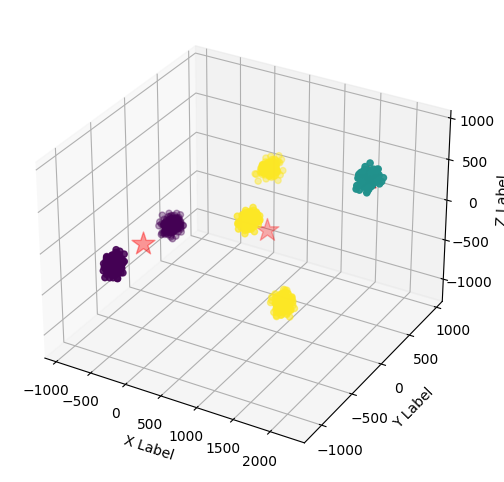

In [3]:
import matplotlib.pyplot as plt

def plot_data(X, y, clusters=np.array([])):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
    if (clusters.size != 0):
        ax.scatter(clusters[:, 0], clusters[:, 1], clusters[:, 2], marker='*', s=300, c='red')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()

plot_data(X, y_kmeans, kmeans.cluster_centers_)

We can count 6 different data cluster, and also that the 3 clusters' center are well positioned. By seeing this graph, we can imagine that the best fitting number of cluster must be around 6. We can check that by using the inertia's values for every number of cluster and check at what moment increasing the number of cluster becomes useless.

To do that, it will iterate between 2 and 10 clusters, train the model and append the inertia in an array to display and compare every value in a graph (the lower the value is the best it is).

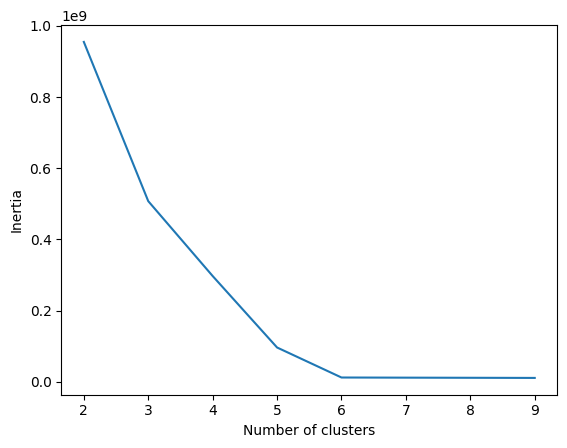

In [4]:
inertias = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.show()

As I said before, we have 6 data clusters and we can see here that after 6 clusters the inertia stays at the same value, which means that 6 clusters is the most optimal to fit these set of data. Now let's try to compute the values for 6 centroids.

time:  0.021318523002264556
Centroids:  [[-8.00575563e+02  2.99114143e+02 -5.99241980e+02 -2.90289048e+01]
 [ 2.10646233e+03  1.42960720e+02  7.97491298e+02  3.01891562e+02]
 [ 9.92744260e+02  1.02474785e+02 -1.00061849e+03  4.44277540e+01]
 [ 5.97623864e+02  3.34265764e+00  8.70466879e+00  1.59928220e+01]
 [-3.94534043e+02 -1.00146268e+03 -1.02119880e+02  5.37737330e-02]
 [ 1.95540559e+02  8.06847037e+02  4.43342094e+01  2.02641931e+02]]


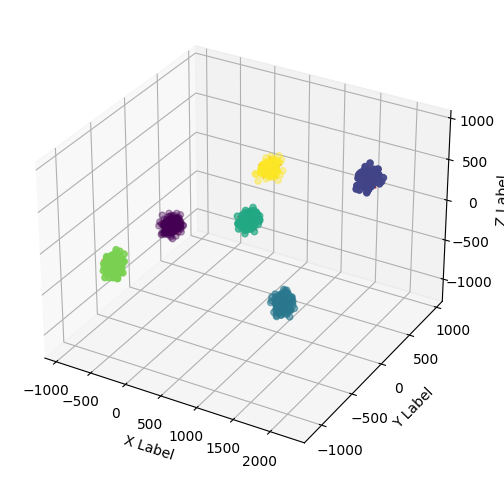

In [5]:
kmeans, y_kmeans = predict_kmeans(6)
plot_data(X, y_kmeans, kmeans.cluster_centers_)

We can see now that the 6 clusters are separated as it should be. Also, the time taken to compute the position is now only ~ 0.2 - 0.3 seconds, which is 2-3x faster than before. Now, let's try a different algorithm to see if we can make a bigger difference with the k-means algorithm. Let's pick the Agglomerative Clustering and 6 clusters as the k-means algorithm.

In [6]:
from sklearn.cluster import AgglomerativeClustering

def predict_agglomerative(n_clusters):
    start = timer()
    agglom = AgglomerativeClustering(n_clusters=n_clusters, affinity="euclidean", linkage="ward")
    agglom.fit(X)
    end = timer()
    print("time: ", end - start)
    return agglom

agglom = predict_agglomerative(6)

time:  0.04796165900188498


We have a similar result with this algorithm than with the first try we did with 3 clusters in the k-means algorithm.

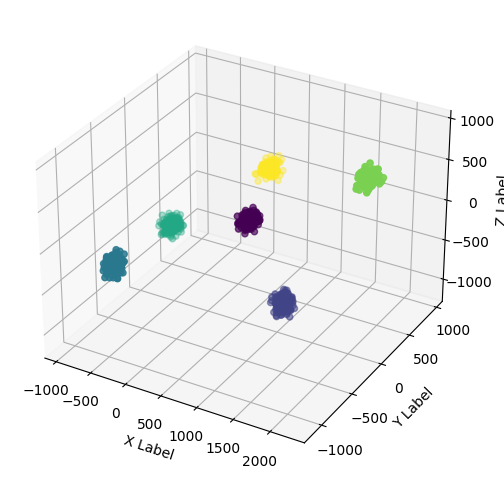

In [7]:
plot_data(X, agglom.labels_)

By plotting the data, we can see that the clusters are similar between the k-means and the agglomerative clustering. Let's see what is the most optimal number of clusters as I did for the k-means algorithm. I will use now the silhouette score. The higher the score is the best it is.

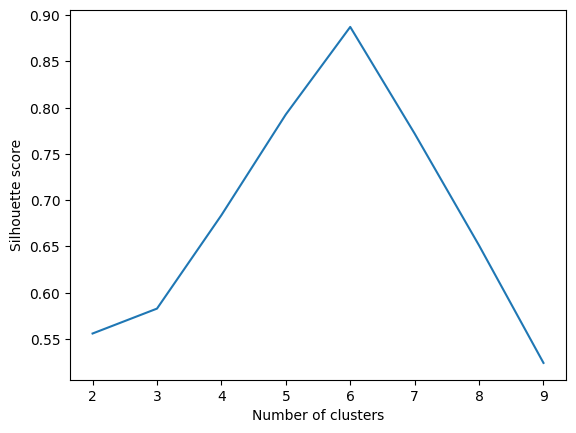

In [8]:
from sklearn.metrics import silhouette_score

silhouettes = []

for k in range(2, 10):
    agglom = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="ward")
    agglom_labels = agglom.fit_predict(X)
    silhouettes.append(silhouette_score(X, agglom_labels))

plt.plot(range(2, 10), silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel("Silhouette score")
plt.show()

There is no doubt on the most optimal number of clusters we have to use with this dataset and this algorithm, but can the metric used to compute the distance between the data can change this optimisation ? For now we used the euclidean metric. Let's try for example with the manhattan metric on the agglomerative clustering (the k-means algorithm only use the euclidean metric).

time:  0.030830789997708052


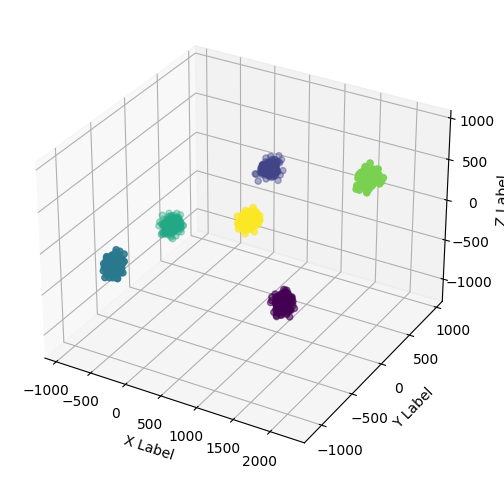

In [9]:
def predict_agglomerative(n_clusters, metric="euclidean", linkage="ward"):
    start = timer()
    agglom = AgglomerativeClustering(n_clusters=n_clusters, affinity=metric, linkage=linkage)
    agglom.fit(X)
    end = timer()
    print("time: ", end - start)
    return agglom

agglom = predict_agglomerative(6, "manhattan", "average")
plot_data(X, agglom.labels_)

After modifying a bit the agglomerative function to give the metric we want to use to the algorithm, we can see that the manhattan metric reduces the computation time by 2x.
With this, the agglomerative clustering is more or less as efficient as the k-means algorithm.

However, no matter what algorithm we use with the perfect number of cluster, we have the same result on the graph. Let's see for 2 clusters if there is a big difference in the results.

time:  0.09004969200032065


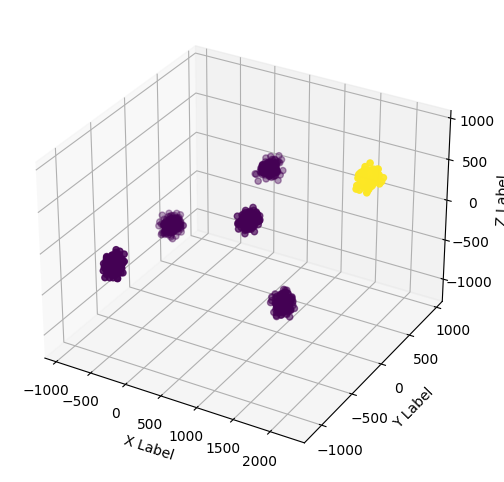

In [10]:
agglom = predict_agglomerative(2, "manhattan", "average")
plot_data(X, agglom.labels_)

time:  0.0171715350006707
Centroids:  [[ 118.15981557   42.06318764 -329.78829449   46.81747518]
 [2106.46232954  142.96071978  797.49129809  301.89156235]]


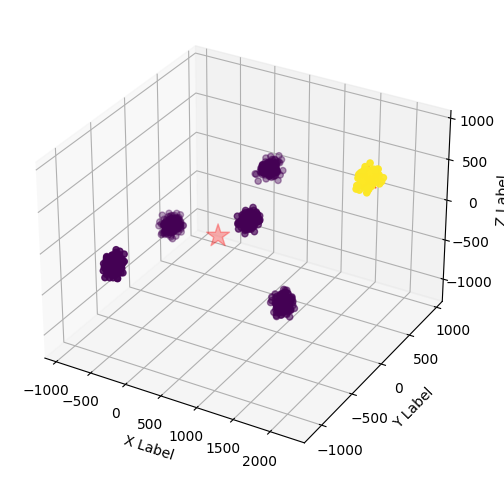

In [11]:
kmeans, y_kmeans = predict_kmeans(2)
plot_data(X, y_kmeans, kmeans.cluster_centers_)

After computing with both algorithm the groups of data, we can see that there is no difference for 2 clusters. I also tried with 3 and 4 and the clusters are the same. However, we can see that the time that the k-means algorithm takes to solve the problem is much less than the agglomerative algorithm. The more centroids it has, the longer it takes.

We can say that for a small number of clusters, the k-means algorithm is way more optimal, but for an optimal and higher number of clusters the agglomerative algorithm might be more efficient. Also, the number of clusters for the agglomerative algorithm has to be optimal or we will lose score and accuracy.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=78fee1a8-8fdd-4237-ba69-e565ec384717' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>